In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MNE: MEG and EEG analysis package
import mne
from mne.datasets import eegbci

import os

In [4]:
# Get project root (go up one level from Notebooks/)
project_root = os.path.dirname(os.getcwd())

# Create a data folder at the project root
data_path = os.path.join(project_root, "data")
os.makedirs(data_path, exist_ok=True)

# Tell MNE to use this path instead of ~/mne_data
mne.set_config("MNE_DATA", data_path, set_env=True)

In [ ]:
# All meta data from here: https://physionet.org/content/eegmmidb/1.0.0/
# Pick one subject (1..109 are available)
SUBJECT = 1

# Example: use runs 3 and 4 (left vs right hand tasks)
RUNS = [3, 4]

# Download EDF files (European Data Format) for this subject & runs
paths = eegbci.load_data(subject=SUBJECT, runs=RUNS, path=data_path)
print("Files downloaded to:", paths)


Download complete in 11s (5.0 MB)
Files downloaded to: [PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf')]


In [24]:
ALL_RUNS = list(range(1, 15))
downloaded_paths = []
for run in ALL_RUNS:
    # expected filename (MNE saves EDF as S###R##.edf)
    fname = f"S{SUBJECT:03d}R{run:02d}.edf"
    fpath = os.path.join(data_path, fname)
    
    if os.path.exists(fpath):
        print(f"✅ Already exists: {fname}")
        downloaded_paths.append(fpath)
    else:
        print(f"⬇️ Downloading run {run} ...")
        paths = eegbci.load_data(subject=SUBJECT, runs=[run], path=data_path)
        downloaded_paths.extend(paths)

print("\nAll runs ready!")
print(downloaded_paths)

⬇️ Downloading run 1 ...


Download complete in 02s (1.2 MB)
⬇️ Downloading run 2 ...


Download complete in 03s (1.2 MB)
⬇️ Downloading run 3 ...
⬇️ Downloading run 4 ...
⬇️ Downloading run 5 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 6 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 7 ...


Download complete in 06s (2.5 MB)
⬇️ Downloading run 8 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 9 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 10 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 11 ...


Download complete in 06s (2.5 MB)
⬇️ Downloading run 12 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 13 ...


Download complete in 05s (2.5 MB)
⬇️ Downloading run 14 ...


Download complete in 05s (2.5 MB)

All runs ready!
[PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R05.edf'), PosixPath('/Users/sumachinta/Library/CloudStorage/OneDrive-CytoTronics/github/eeg-bci-pipeline/data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf'), PosixP

In [40]:
# Read EDFs into Raw objects
raws = [mne.io.read_raw_edf(p, preload=True, stim_channel="STI 014", verbose=False) for p in paths]

# Concatenate them into a single continuous recording
raw = mne.concatenate_raws(raws)

# Standardize channel names & set electrode montage (locations)
mne.datasets.eegbci.standardize(raw)
raw.set_montage("standard_1020")
print(raw) # channels, sfreq, duration 

<RawEDF | S001R14.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>


In [41]:
# List all channel types (so you see EEG vs stim)
print(raw.get_channel_types())
print(raw.info)

['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


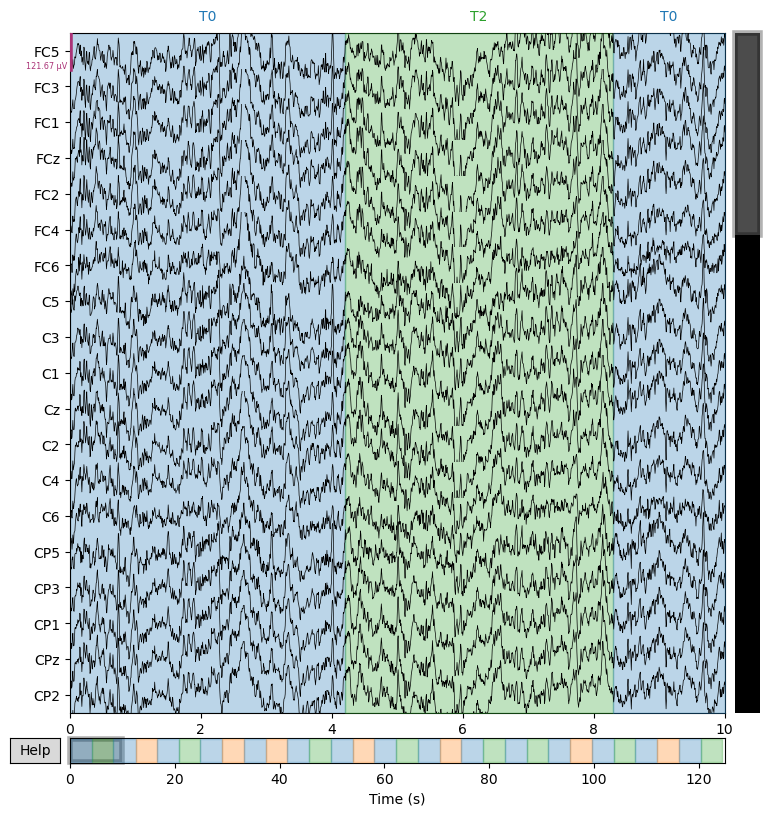

/var/folders/bv/kk8vqccx7mj8svh4drmw2qjh0000gn/T/ipykernel_34405/2904212978.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [39]:
# Plot first 20 seconds, including the stimulus channel
fig = raw.plot(start=0, duration=10, scalings="auto", n_channels=19, title="EEG + Stimulus Channel")
fig.show()

In [42]:
events, event_id_map = mne.events_from_annotations(raw)
print("Event map:", event_id_map)
print("First 10 events:\n", events[:10])


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Event map: {np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}
First 10 events:
 [[   0    0    1]
 [ 672    0    3]
 [1328    0    1]
 [2000    0    2]
 [2656    0    1]
 [3328    0    3]
 [3984    0    1]
 [4656    0    2]
 [5312    0    1]
 [5984    0    2]]


In [ ]:
psds, freqs = mne.time_frequency.psd_welch(raw, fmin=1, fmax=40, n_fft=1024)
plt.figure()
plt.plot(freqs, psds.mean(axis=0))
plt.xlabel("Hz")
plt.ylabel("Power")
plt.title("Average PSD (1–40 Hz)") 
plt.show()